# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

# Часть 1

В данном задании вам необходимо **самостоятельно** реализовать один из алгоритмов кластеризации.  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).  
В классе помимо `__init__()` нужно реализовать два метода:
 - `fit()` - метод, выполняющий кластеризацию данных.
 - `predict()` - метод, определяющий для нового объекта, к какому из кластеров он относится. 
 
Для удобства можно создавать дополнительные методы класса, которые будут вызываться в `fit()` или `predict()`.  <br>
Функции для вычисления расстояний *между объектами* самим реализовывать не нужно, используйте реализации из `scipy`.

In [429]:
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import pdist


class NotSupportedLinkageError(Exception):
    """
    Custom error
    """

    
class UnknownNumberOfClustersError(Exception):
    """
    Custom error
    """


class My_Clust(BaseEstimator, ClusterMixin):
    
    """
    My implementation of clustering algorithm  
    """
    
    def __init__(self, metric='euclidean', linkage='single', n_clusters=None, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.metric = metric
        if linkage not in ('single', 'complete', 'average'):
            raise NotSupportedLinkageError('The imported linkage is not supported, use: single, complete or average')
        self.linkage = linkage
        self.n_clusters = n_clusters
        self.z_ = []
        self.data_ = []
        self.labels_ = []
        
    def fit(self, X):
        """
        Use data matrix X to compute model parameters
        """
        self.data_ = X
        try:
            self.z_ = pdist(self.data_, self.metric)
        except ValueError as e:
            print(e)
        
        self.z_ = squareform(dm)
        self.z_ = pd.DataFrame(dm, columns=range(len(dm)))
        
        if self.n_clusters:
            self.get_labels()
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from matrix X
        """
        new_labels = []
        print('Unfortunately, this method is not implemented yet')
        
        return new_labels
    
    def get_labels(self):
        
        if self.n_clusters is None:
            raise UnknownNumberOfClustersError('Impossible to get labels, I don`t know the number of clusters')
        
        names = list(range(len(self.z_)))

        while len(self.z_.columns) != self.n_clusters:
            minimum = self.data_.max().max()
            min_indexes = tuple()
            min_indexes_names = tuple()

            for index, row in self.z_.iterrows():
                for i in range(len(self.z_.columns)-1):
                    if row.iloc[i] != 0.00 and row.iloc[i] < minimum:
                        minimum = row.iloc[i] 
                        indexes_names = [names[index], self.z_.columns[i]]
                        min_indexes = tuple([index, i]) # index -> rows, i -> cols

            min_indexes_names = []

            for n, c in enumerate(indexes_names):
                if isinstance(c, tuple):
                    tup_ind = list(indexes_names[n])
                    min_indexes_names.extend(tup_ind)
                else:
                    min_indexes_names.append(c)

            min_indexes_names = tuple(min_indexes_names)

            if not min_indexes:
                min_indexes = (0, 0)

            if not min_indexes_names:
                min_indexes_names = tuple([names[0], self.z_.columns[0]])

            new_distances = []

            for index, row in self.z_.iterrows():
                if self.linkage == 'single':
                    if self.z_.iloc[index,min_indexes[0]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[0]])
                    elif self.z_.iloc[index,min_indexes[1]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[1]])
                    else:
                        new_distances.append(min(self.z_.iloc[index,min_indexes[0]], self.z_.iloc[index,min_indexes[1]]))

                elif self.linkage == 'complete':
                    if self.z_.iloc[index,min_indexes[0]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[0]])
                    elif self.z_.iloc[index,min_indexes[1]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[1]])
                    else:
                        new_distances.append(max(self.z_.iloc[index,min_indexes[0]], self.z_.iloc[index,min_indexes[1]]))

                elif self.linkage == 'average':
                    if self.z_.iloc[index,min_indexes[0]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[0]])
                    elif self.z_.iloc[index,min_indexes[1]] == 0.0:
                        new_distances.append(self.z_.iloc[index,min_indexes[1]])
                    else:
                        new_distances.append([self.z_.iloc[index,min_indexes[0]], self.z_.iloc[index,min_indexes[1]]].mean())

            self.z_[min_indexes_names] = new_distances
            if len(new_distances) != self.z_.shape[1]:
                new_distances.append(0.00)
            self.z_.loc[len(self.z_)] = new_distances
            names.append(min_indexes_names)

            for elem in sorted(min_indexes, reverse=True):
                if min_indexes[0] == min_indexes[1] and elem == min_indexes[1]:
                    continue
                self.z_ = self.z_.drop(elem, axis=0)
                self.z_ = self.z_.drop(self.z_.columns[elem], axis=1)
                names.pop(elem)

            self.z_ = self.z_.reset_index(drop=True)

        self.labels_ = [0 for i in range(len(self.z_.columns[0]))]
        for index, col in enumerate(self.z_.columns[1:], start=1):
            for ind in col:
                self.labels_.insert(ind, index)
            
        return self.labels_

    

### Задание

Алгоритм агломеративной кластеризации.  
  
Параметры: 
- **metric:** Функция расстояния между объектами. Должны поддерживаться метрики из `scipy.spatial.distance`, самописные функции (callable) и предрассчитанная матрица расстояний.  
- **linkage:** Расстояние между кластерами. Должны поддерживаться Single, Complete и Average.  
- **n_clusters:** Число кластеров. По умолчанию должно быть None. 

  
Атрибуты:  
- **z_:** матрица объединений, аналогичная той, что возвращает `linkage()` из `scipy.cluster.hierarchy`;
- **data_:** копия данных, использованных для кластеризации;  
- **labels_:** метки кластеров для каждого объекта.   
  
Дополнительно нужно реализовать метод `get_labels()` для вычисления **labels_**, он должен быть аналогичен [fcluster()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html). <br>
В случае, если **n_clusters** не None, то после вычисления матрицы **z_** в методе `fit()` должен быть вызван `get_labels()` с соответствующими параметрами, и вычислены **labels_**. В других случаях метод `fit()` только вычисляет матрицу **z_**, для вычисления **labels_** нужно явно вызывать `get_labels()`. 
  
Метод `predict()`:  Кластер для нового объекта определяется по методу, заданному в **linkage**.  <br>
**Note:** Метод `predict()` не выполняется в случае, когда **metric** - это матрица расстояний.

### Тестирование 

Вашу реализацию необходимо сравнить с питоновской реализацией алгоритма из `sklearn` или `scipy`. Результаты кластеризации должны совпадать.  
Также необходимо сравнить скорость работы вашей реализации и питоновской (это нормально, если ваша реализация будет медленнее).  
Сравнение необходимо выполнить на наборе данных iris.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
iris = load_iris()
X = iris.data # использовать для кластеризации
y = iris.target # истинные метки цветков

In [416]:
X_answers = pd.DataFrame(X, columns=iris.feature_names)
X_answers['class'] = [iris.target_names[i] for i in y]

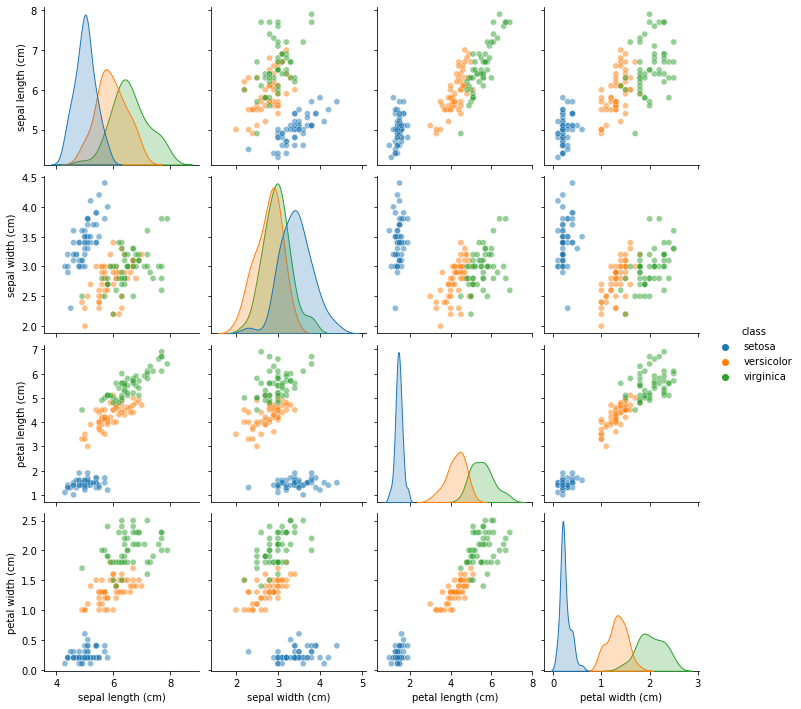

In [5]:
sns.pairplot(X_answers, hue='class', plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

In [430]:
my_clust = My_Clust(metric='euclidean', linkage='single', n_clusters=3)
my_clust.fit(X)
print(my_clust.get_labels())

[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


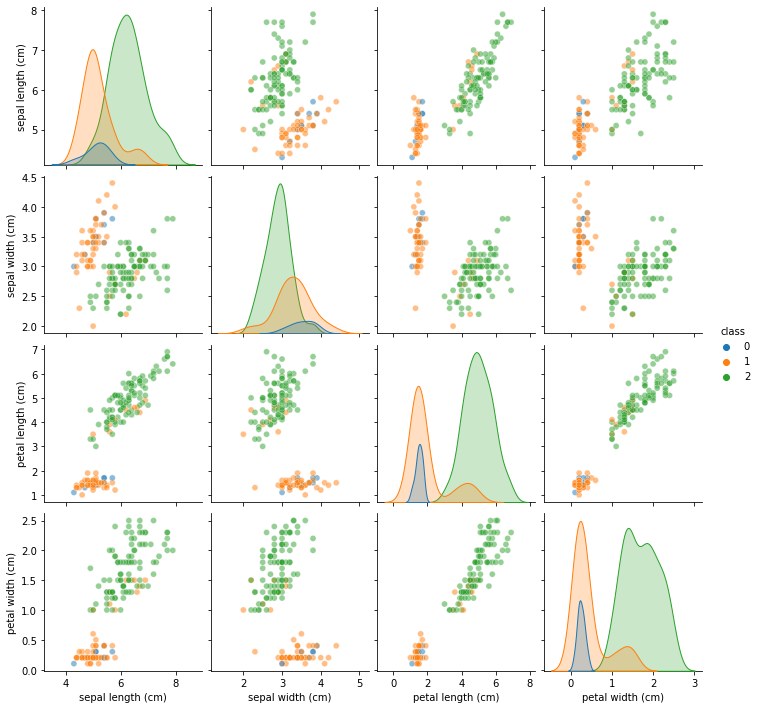

In [431]:
X_clustered = pd.DataFrame(X, columns=iris.feature_names)
X_clustered['class'] = my_clust.get_labels()

sns.pairplot(X_clustered, hue='class', palette="tab10", plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

### Бонусное  
  
Дополнительно вы можете поработать над эффективностью алгоритма по скорости и памяти, добавить поддержку многопоточности, или расширить базовый функционал.

# Часть 2

В данном задании вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [2]:
pd.set_option('display.max_colwidth', None)

In [2]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

Attribute  \
0                       Place   
1           Climate & Terrain   
2                     Housing   
3   Health Care & Environment   
4                       Crime   
5              Transportation   
6                   Education   
7                    The Arts   
8                  Recreation   
9                   Economics   
10                  Longitude   
11                   Latitude   
12                 Population   

                                          Description  
0                           City, state (postal code)  
1   Very hot and very cold months, seasonal temper...  
2   Utility bills, property taxes, mortgage payments.  
3   Per capita physicians, teaching hospitals, med...  
4            Violent crime rate, property crime rate.  
5   Daily commute, public transportation, Intersta...  
6   Pupil/teacher ratio in the public K-12 system,...  
7   Museums, fine arts and public radio stations, ...  
8   Good restaurants, public golf courses, certifi...  
9   Average household income adjusted for taxes an...  
10                                          Longitude  
11                                           Latitude  
12                                         Population

### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [28]:
data = pd.read_csv('Data.txt', sep=' ')
data

Place  Climate  HousingCost  HlthCare  Crime  \
0                    Abilene,TX      521         6200       237    923   
1                      Akron,OH      575         8138      1656    886   
2                     Albany,GA      468         7339       618    970   
3    Albany-Schenectady-Troy,NY      476         7908      1431    610   
4                Albuquerque,NM      659         8393      1853   1483   
..                          ...      ...          ...       ...    ...   
324                Worcester,MA      562         8715      1805    680   
325                   Yakima,WA      535         6440       317   1106   
326                     York,PA      540         8371       713    440   
327        Youngstown-Warren,OH      570         7021      1097    938   
328                Yuba-City,CA      608         7875       212   1179   

     Transp  Educ  Arts  Recreat  Econ      Long      Lat     Pop  
0      4031  2757   996     1405  7633  -99.6890  32.5590  110932  
1      4883  2438  5564     2632  4350  -81.5180  41.0850  660328  
2      2531  2560   237      859  5250  -84.1580  31.5750  112402  
3      6883  3399  4655     1617  5864  -73.7983  42.7327  835880  
4      6558  3026  4496     2612  5727 -106.6500  35.0830  419700  
..      ...   ...   ...      ...   ...       ...      ...     ...  
324    3643  3299  1784      910  5040  -71.7950  42.2720  402918  
325    3731  2491   996     2140  4986 -120.5130  46.5950  172508  
326    2267  2903  1022      842  4946  -76.7280  39.9600  381255  
327    3374  2920  2797     1327  3894  -80.7290  41.1700  531350  
328    2768  2387   122      918  4694 -121.6220  39.1280  101979  

[329 rows x 13 columns]

<br>  
  
## Задания: 

1. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.  
  
  
2. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы. 
  
  
3. Выполните кластеризацию методом Dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
  
  
4. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
  
  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
  
  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиений объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
  
  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
  
  
8. Оцените, как полученные кластеры распределены географически.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?  
(Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.

In [29]:
# Data Prepocessing
from sklearn import preprocessing

d = preprocessing.normalize(data.drop(columns=['Place', 'Long', 'Lat']), axis=0)
scaled_data = pd.DataFrame(d, columns=data.drop(columns=['Place', 'Long', 'Lat']).columns)
scaled_data.head()

Climate  HousingCost  HlthCare     Crime    Transp      Educ      Arts  \
0  0.052029     0.039381  0.008419  0.049641  0.049913  0.053652  0.009797   
1  0.057421     0.051691  0.058823  0.047651  0.060463  0.047444  0.054731   
2  0.046736     0.046616  0.021952  0.052169  0.031340  0.049818  0.002331   
3  0.047535     0.050230  0.050831  0.032807  0.085228  0.066145  0.045789   
4  0.065810     0.053311  0.065821  0.079760  0.081203  0.058887  0.044225   

    Recreat      Econ       Pop  
0  0.038451  0.074740  0.005917  
1  0.072031  0.042594  0.035224  
2  0.023509  0.051406  0.005996  
3  0.044253  0.057418  0.044588  
4  0.071483  0.056077  0.022388

## 2. Иерархическая кластеризация

### Проверим разные расстояния между кластерами

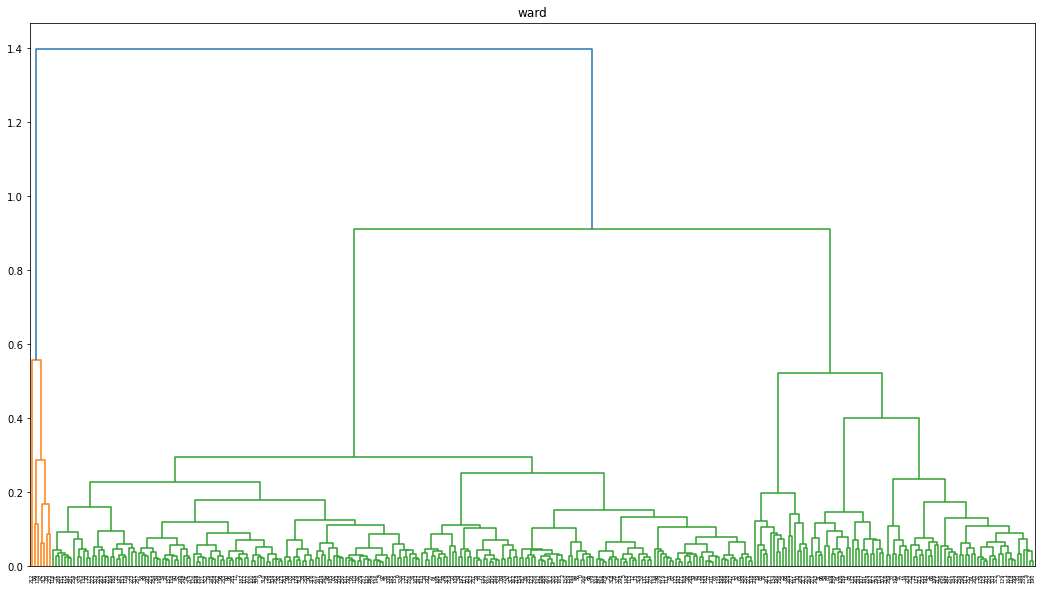

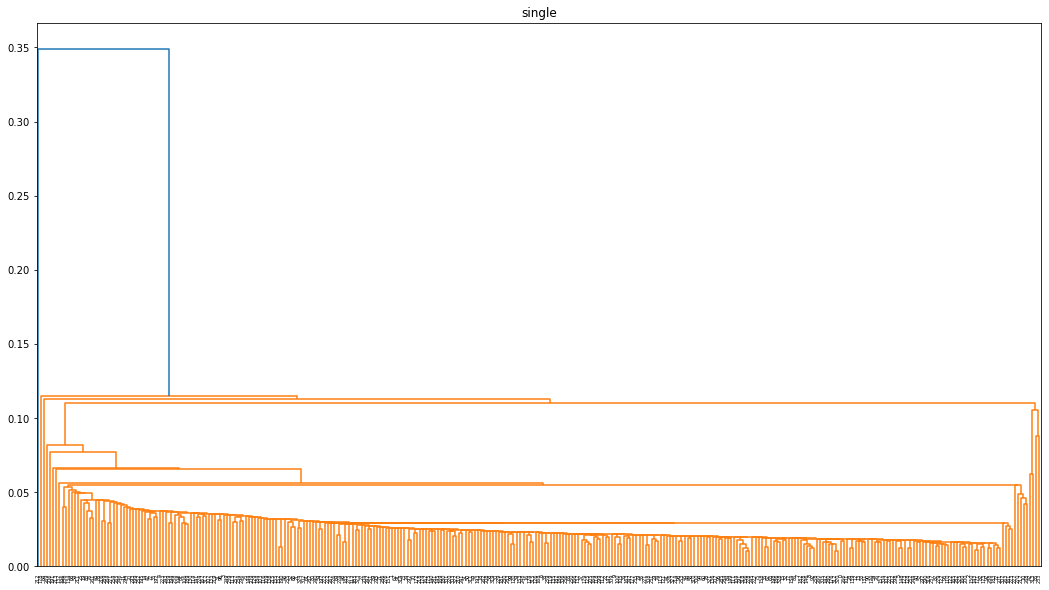

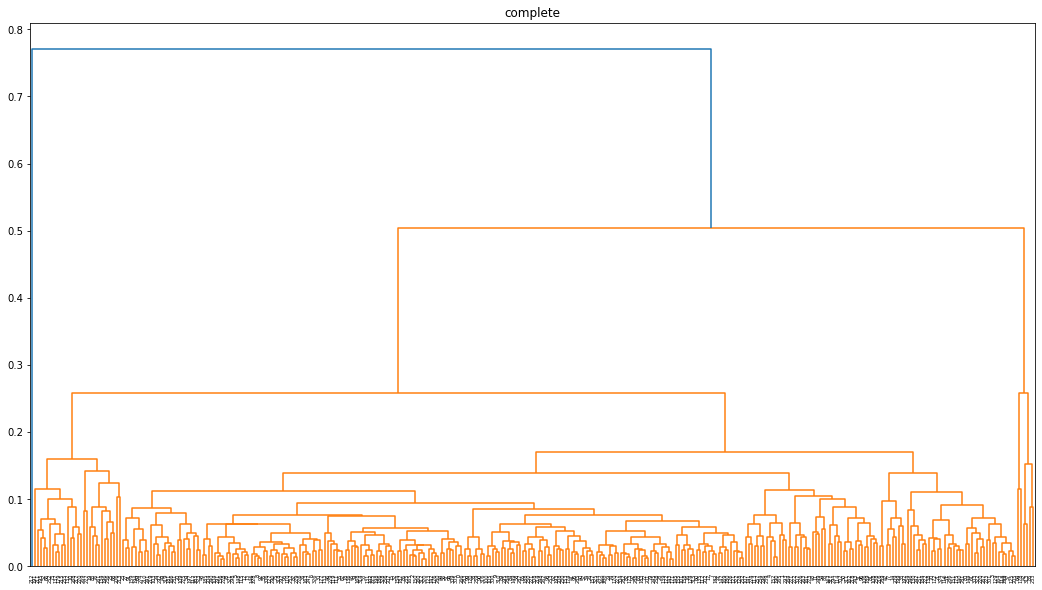

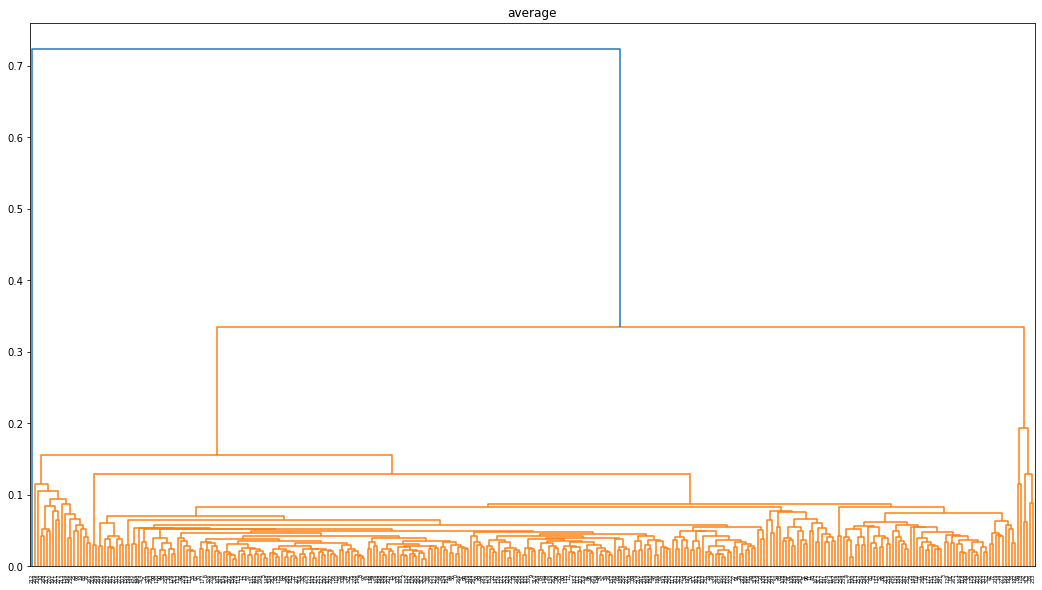

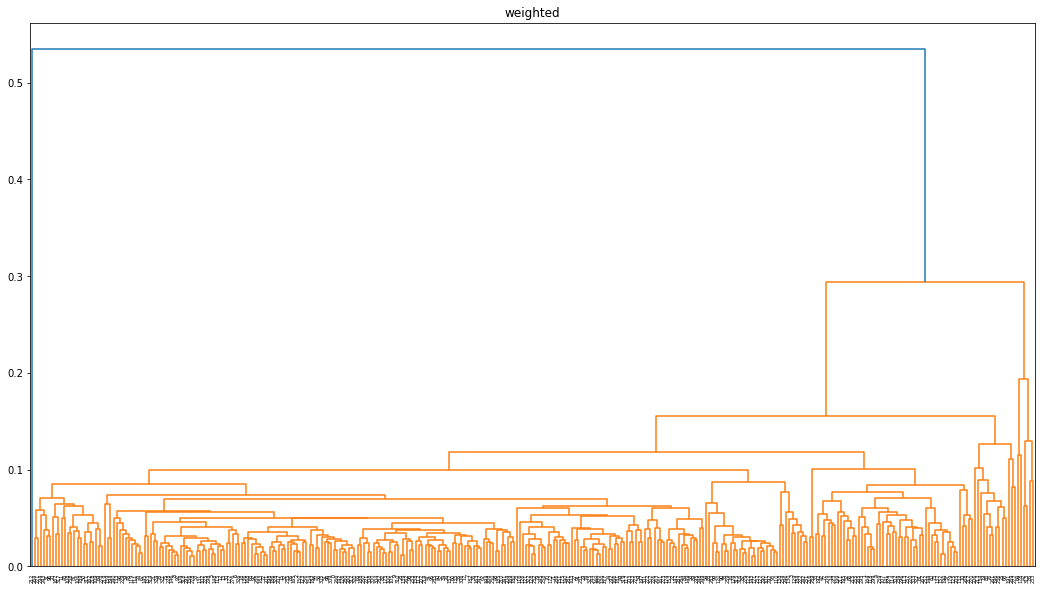

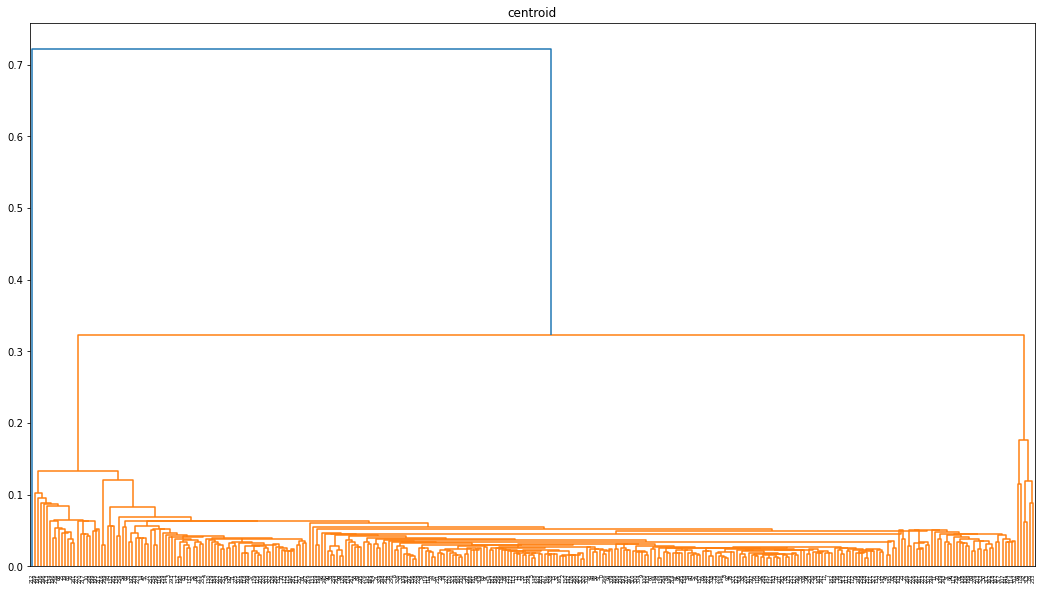

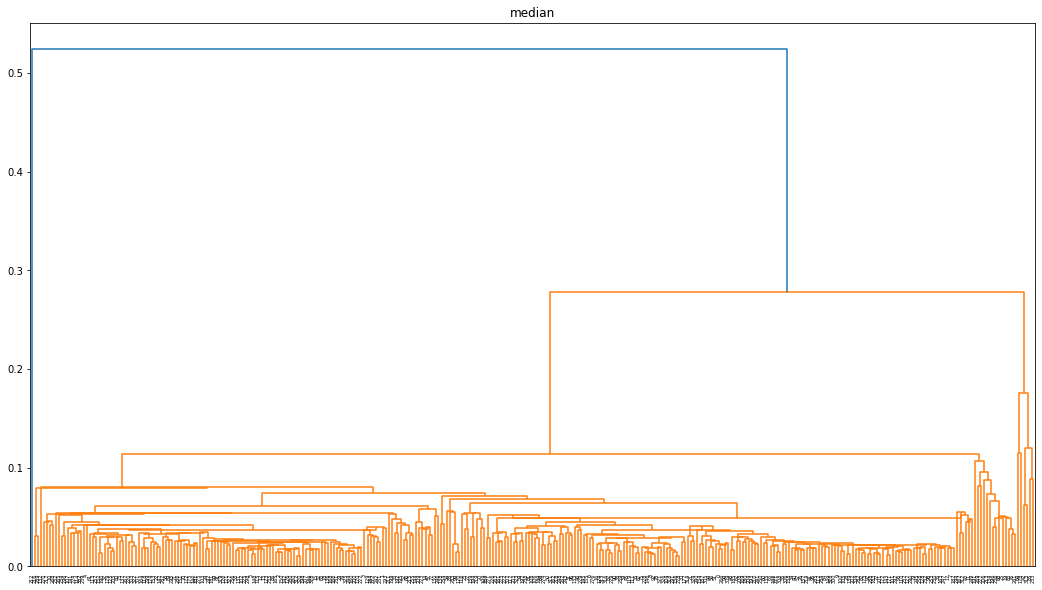

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

for l in ['ward', 'single', 'complete', 'average', 'weighted', 'centroid', 'median']:
    plt.figure(figsize=(18, 10))
    Z = linkage(scaled_data, l)
    plt.title(l)
    dendrogram(Z)
    plt.show()

### Вывод

Судя по денрограммам, наилучшим решением будет использовать расстояние ward, а оптимальным количеством кластеров - 3. Посмотрим подтвердятся ли те же данные в собственно алгоритме кластеризации.

Using "ward" linkage


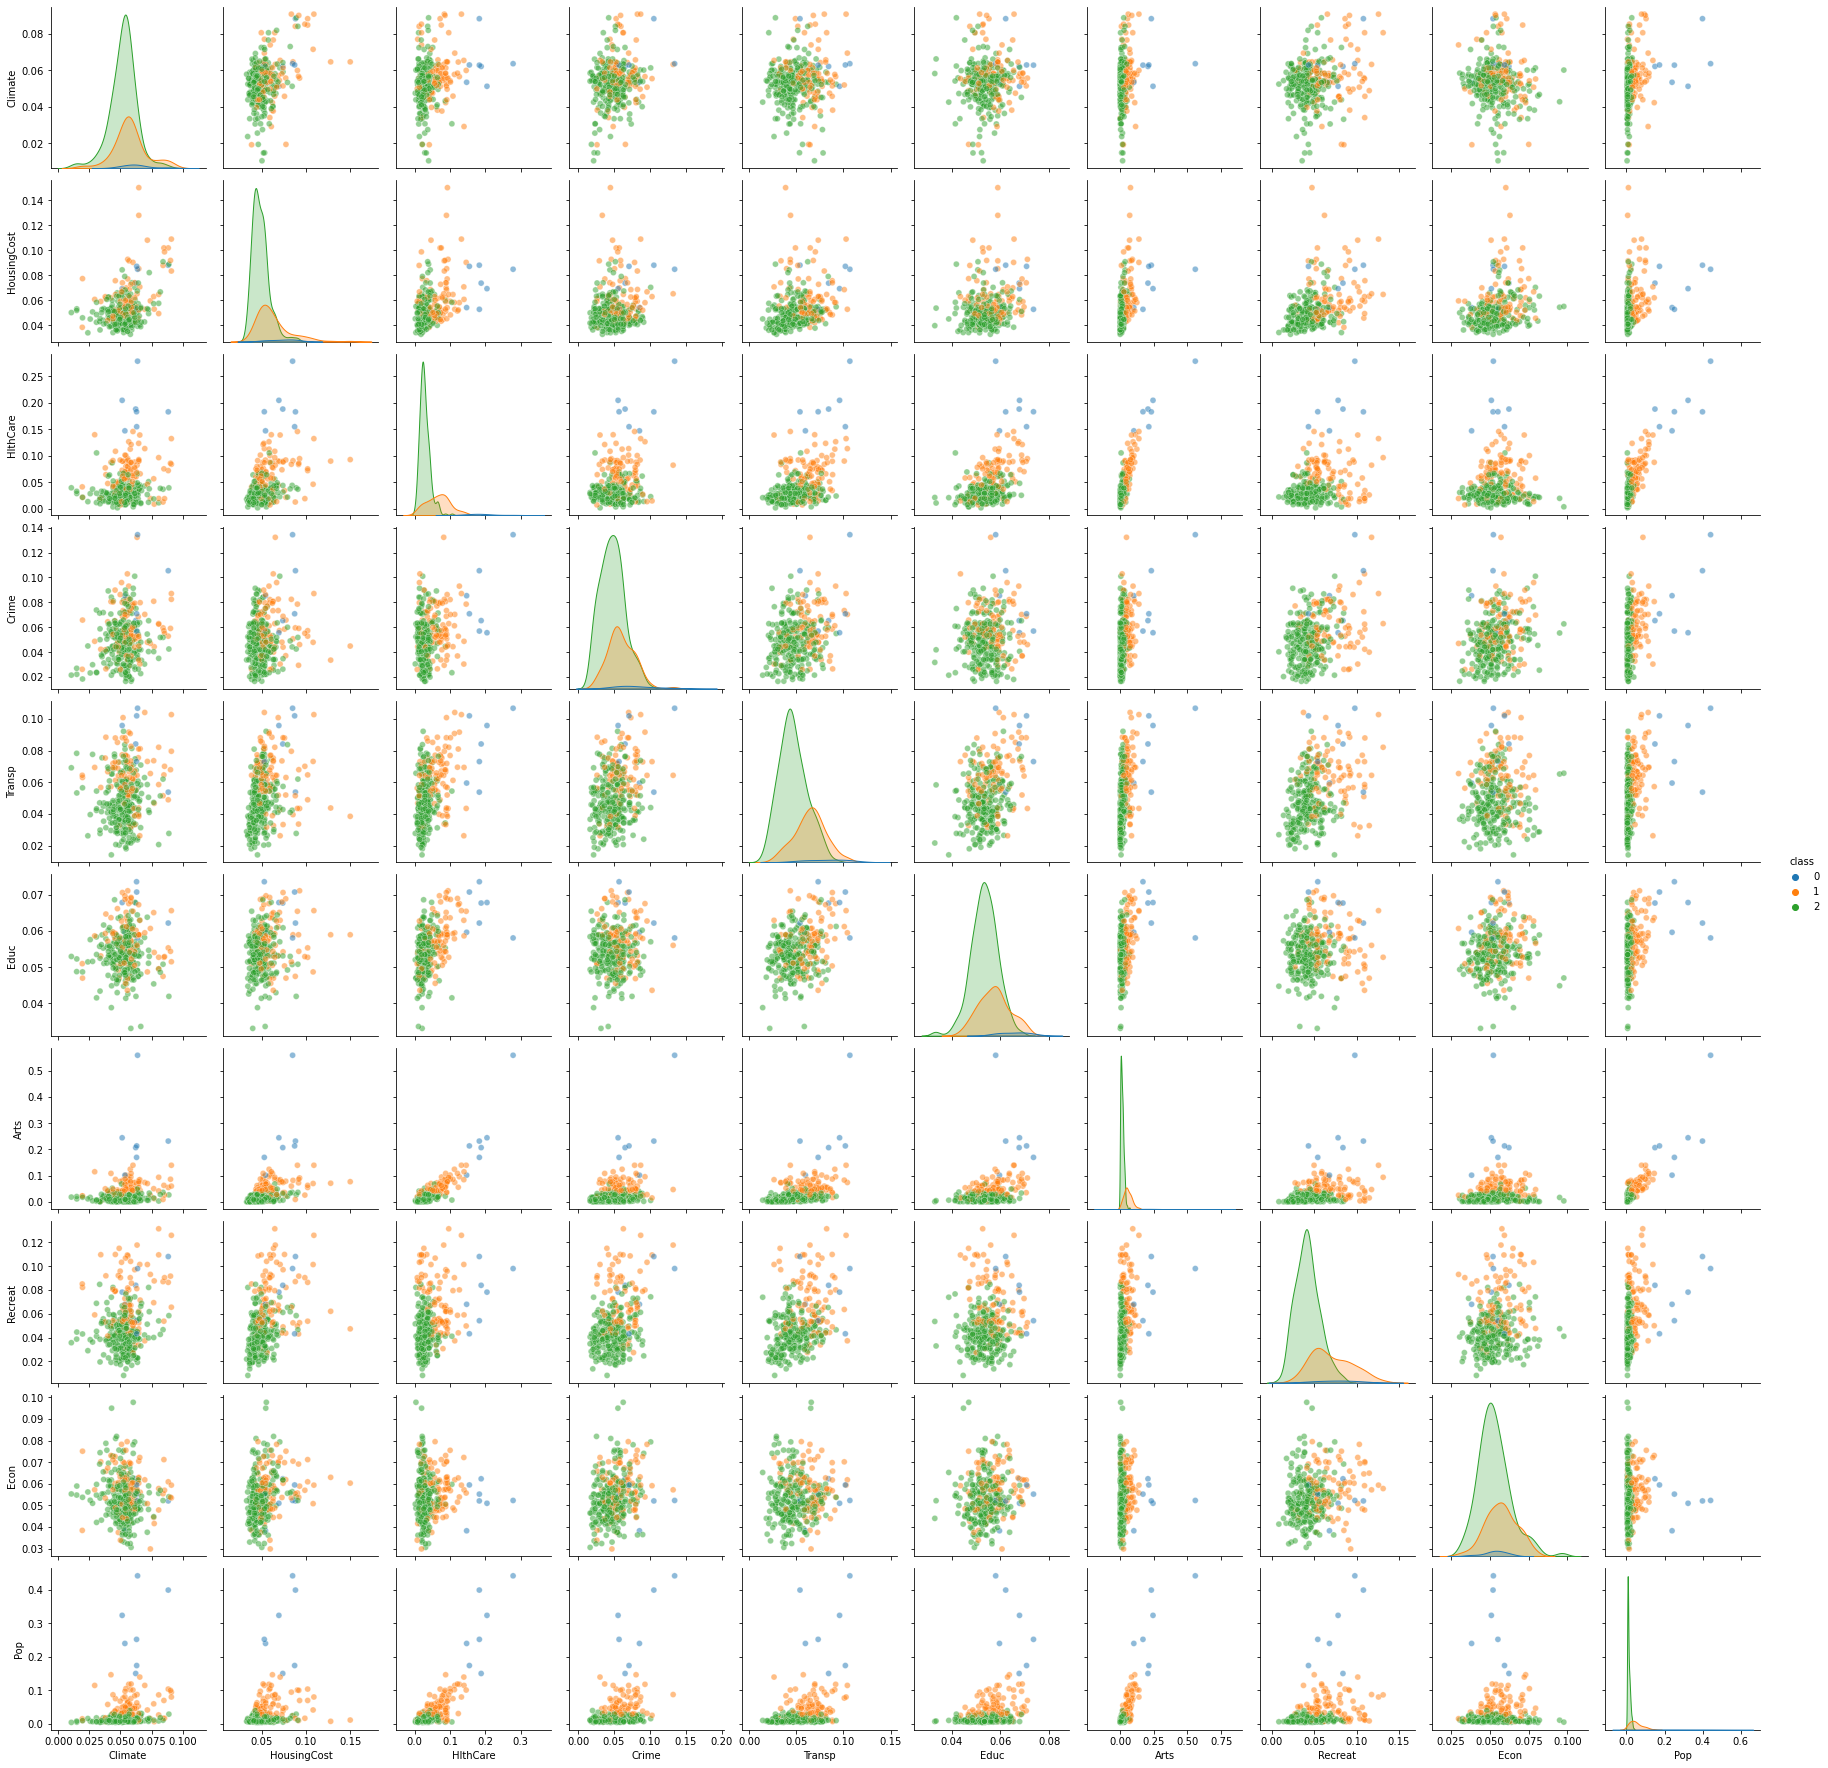

Using "complete" linkage


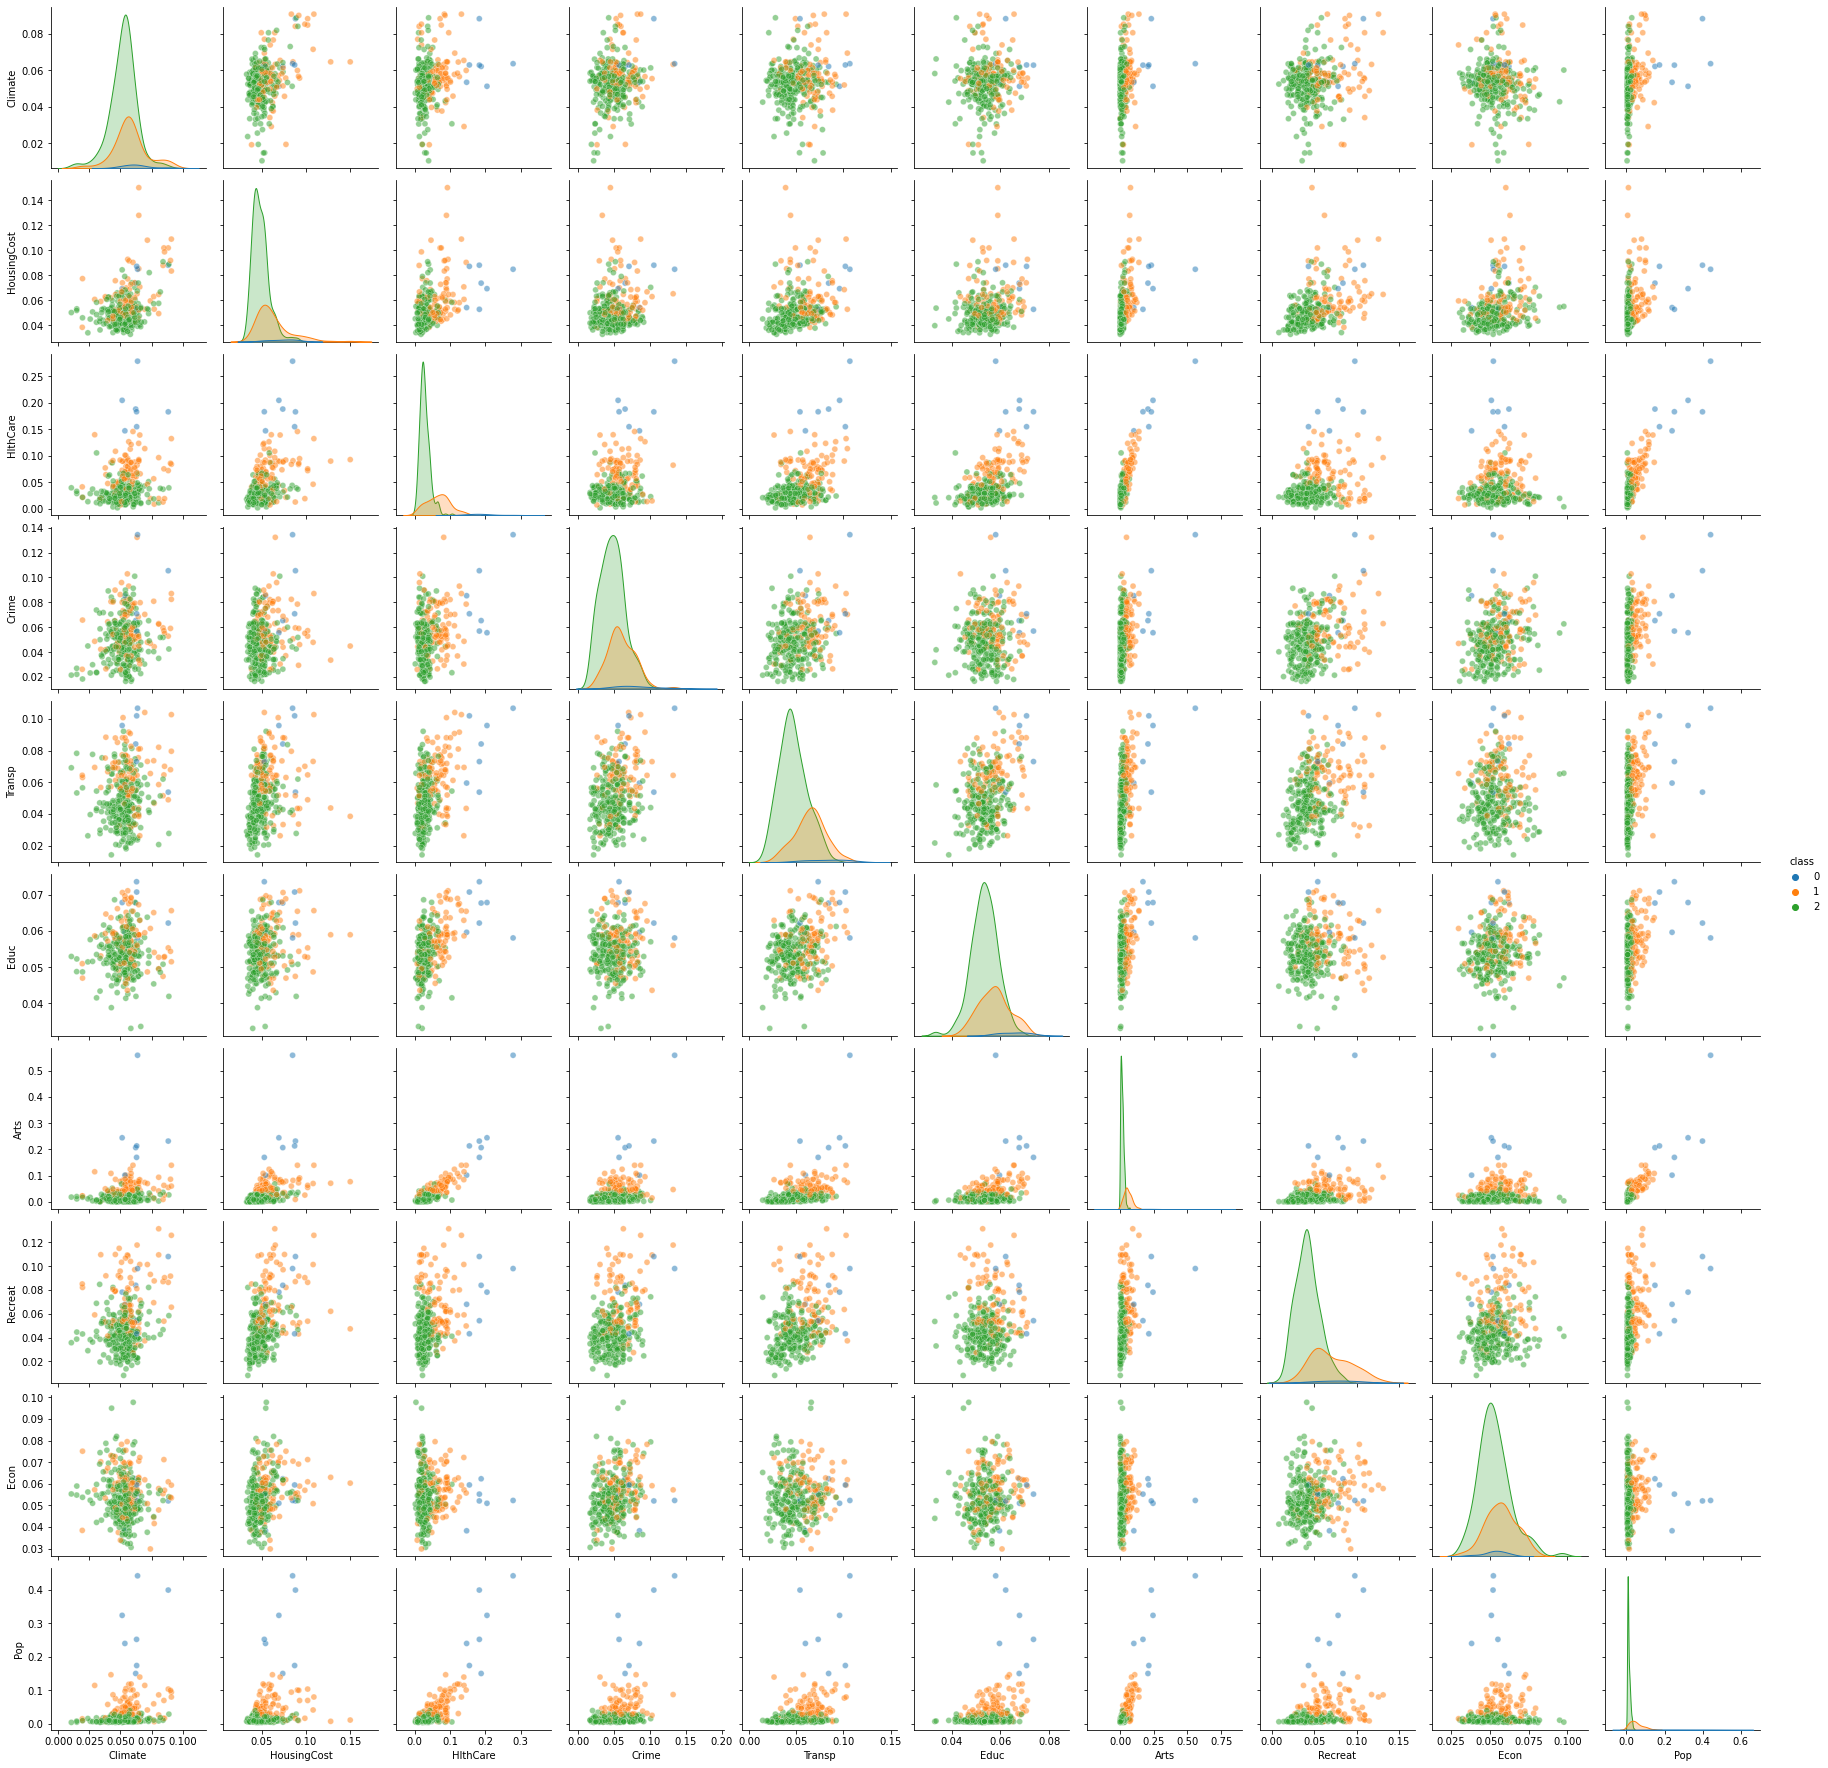

Using "average" linkage


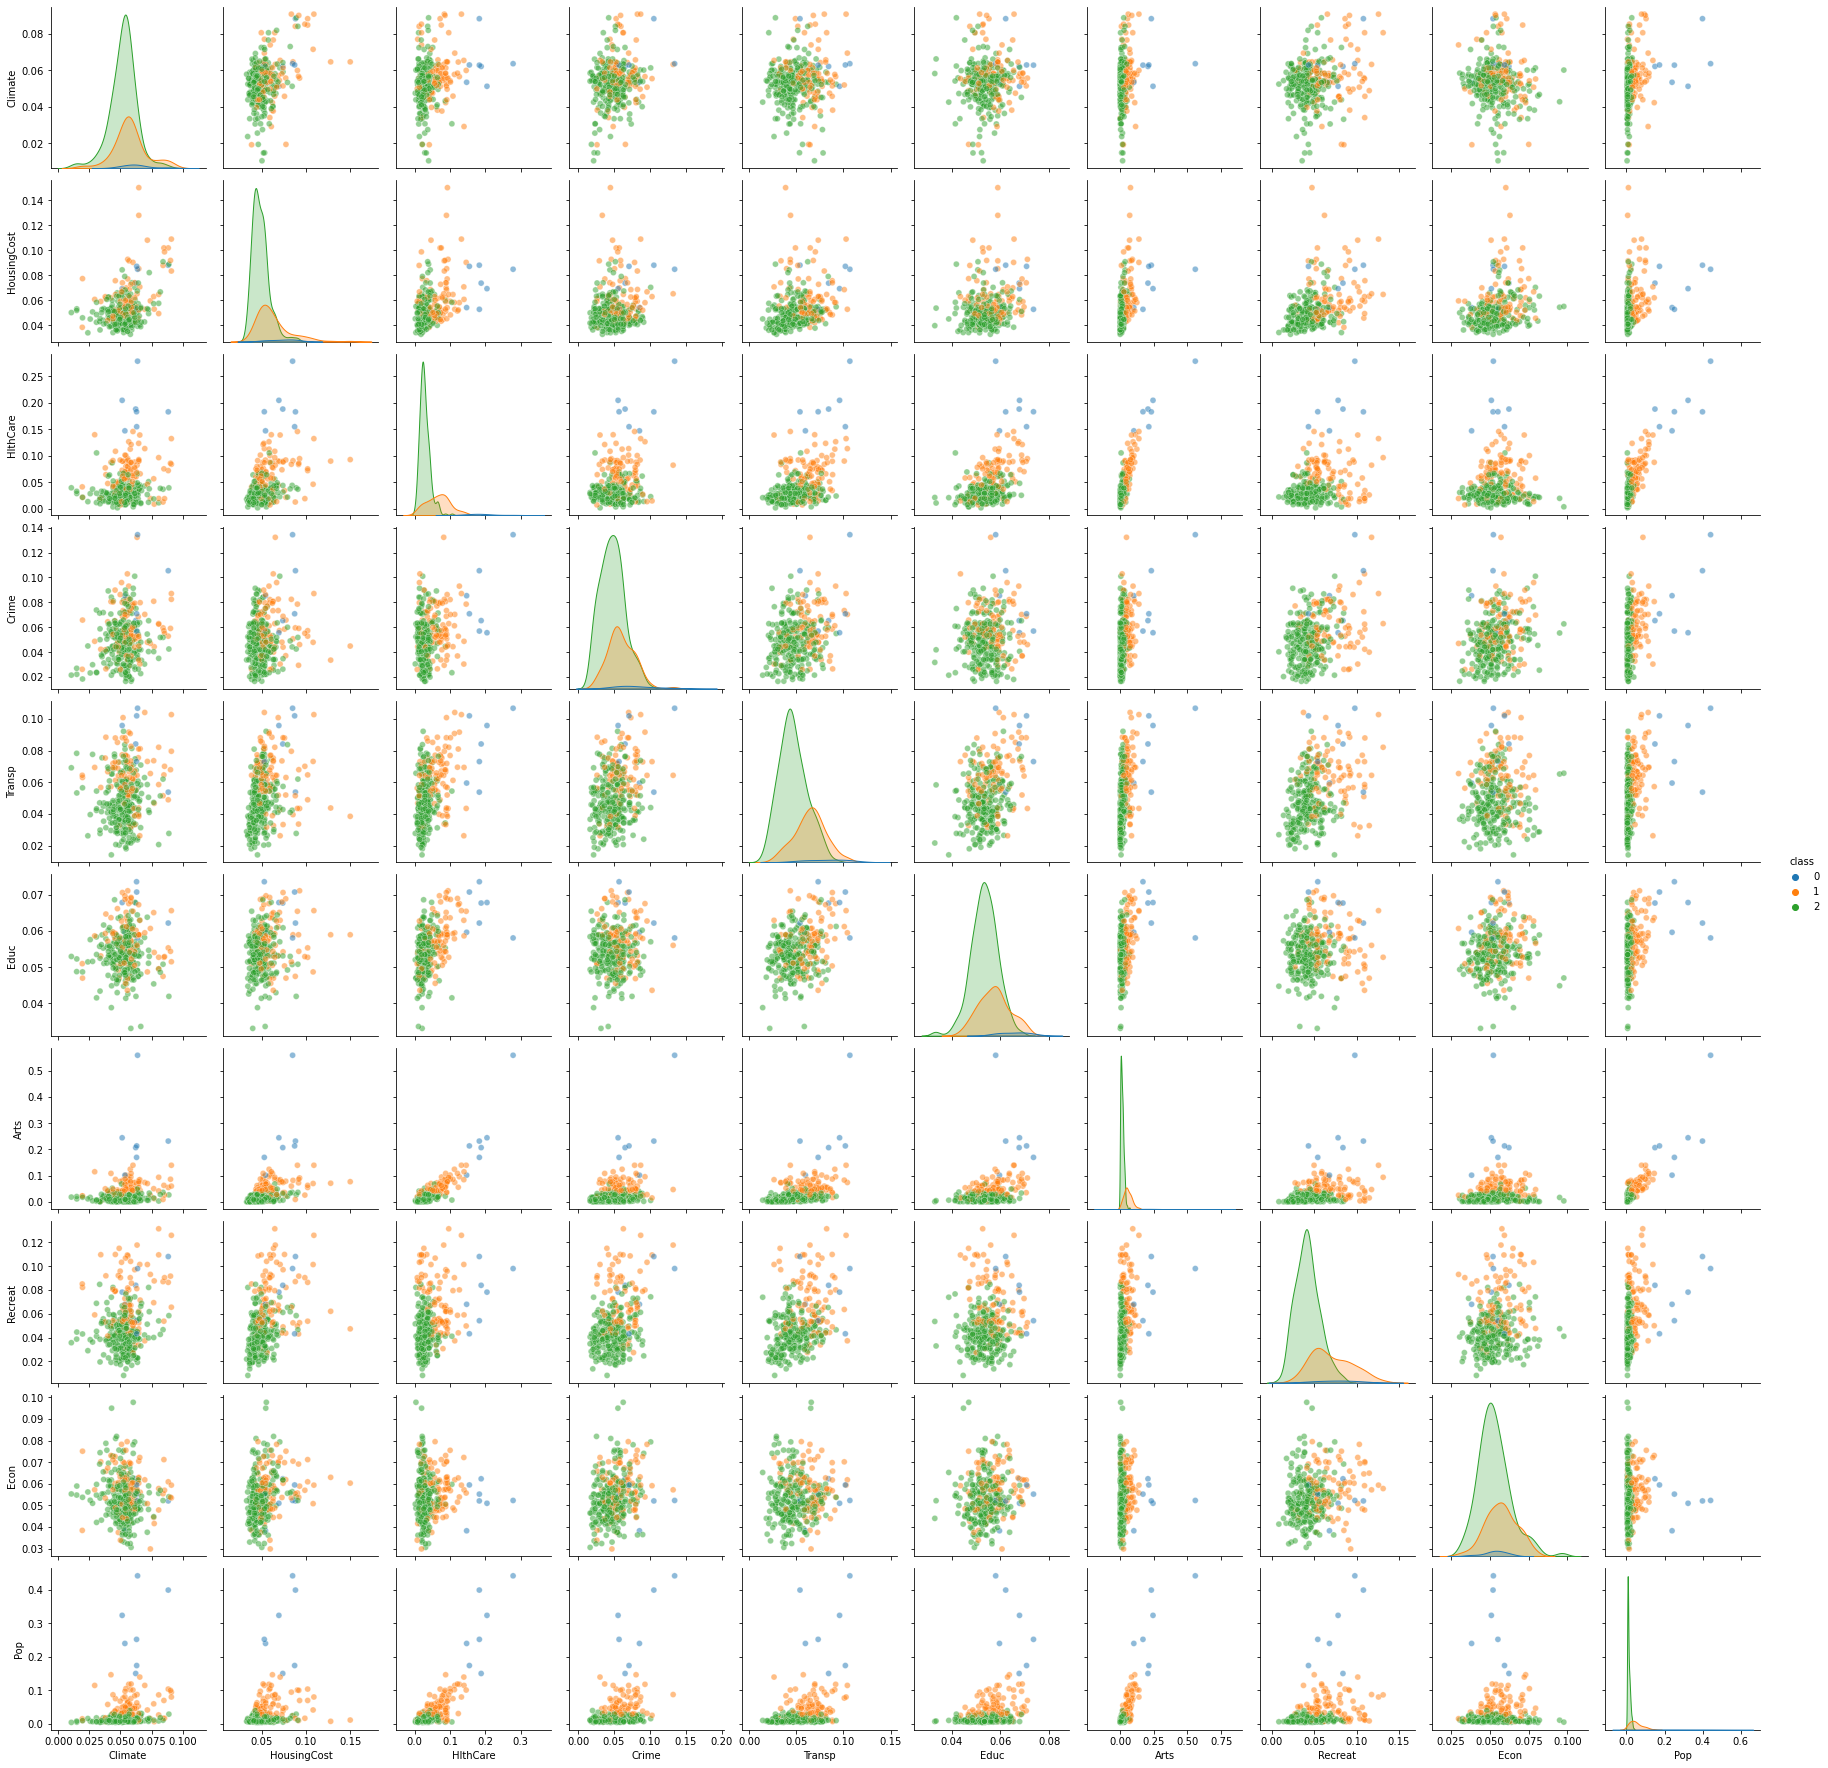

Using "single" linkage


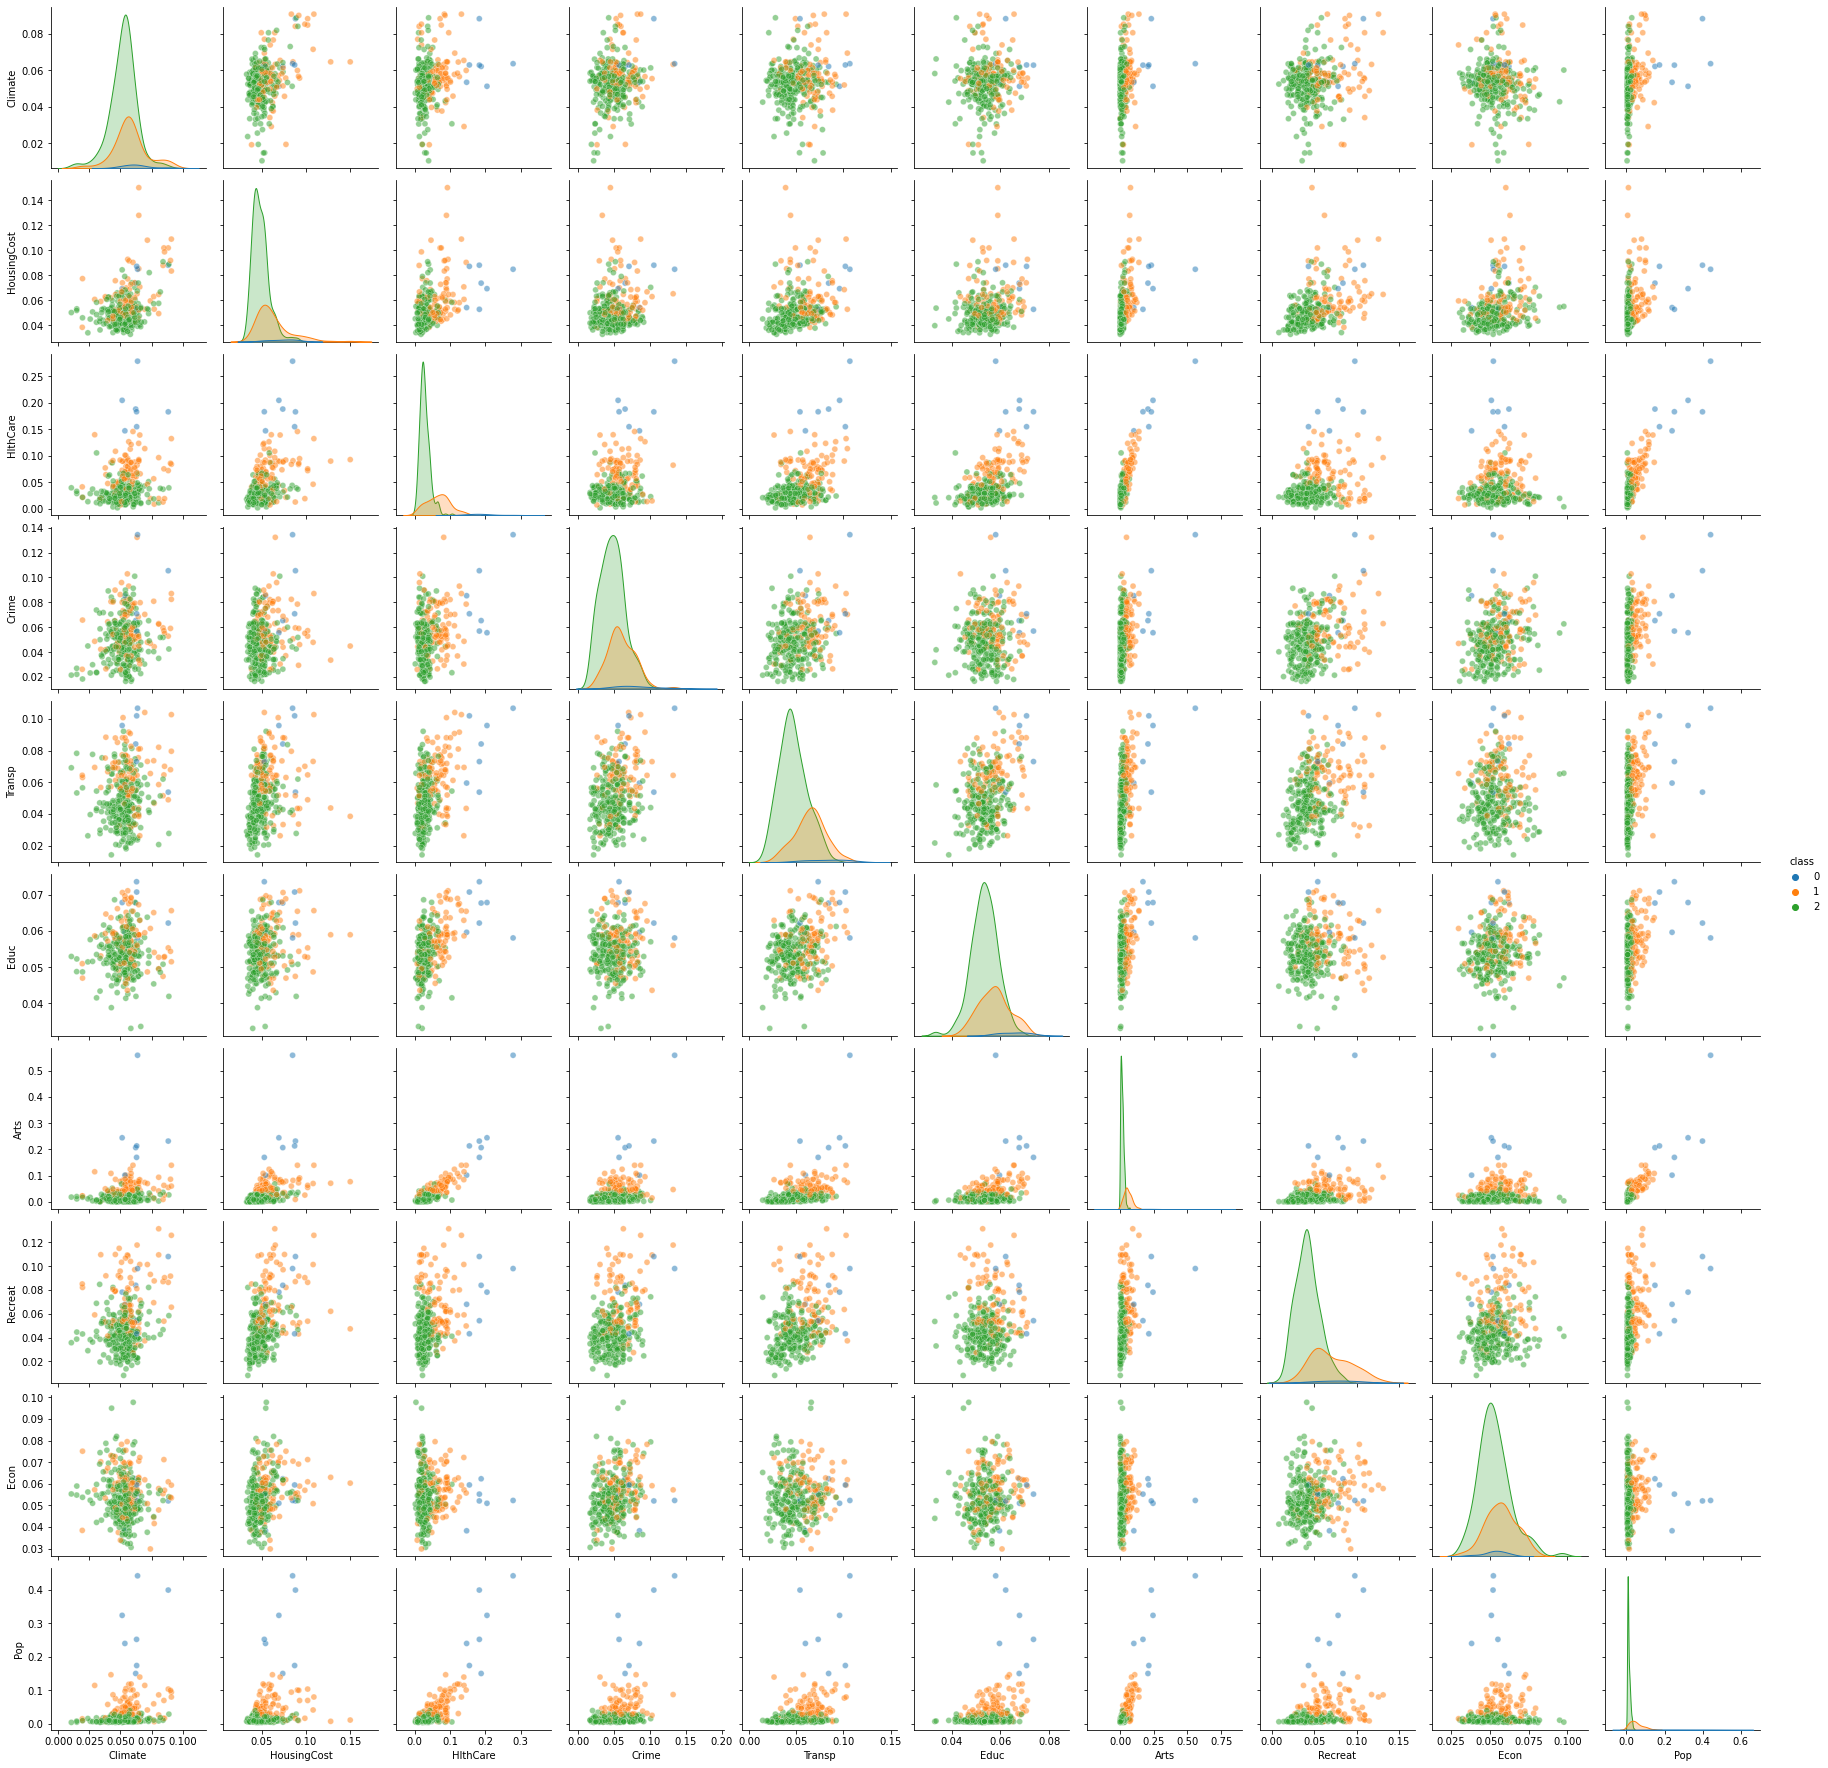

In [137]:
from sklearn.cluster import AgglomerativeClustering

clustered_data = scaled_data.copy()

for l in ['ward', 'complete', 'average', 'single']:
    agg_clustering = AgglomerativeClustering(linkage=l, n_clusters=3).fit(clustered_data)
    clustered_data['class'] = agg_clustering.labels_
    print(f'Using "{l}" linkage')
    sns.pairplot(clustered_data, hue='class', palette="tab10", plot_kws={'alpha':0.5}, vars=clustered_data.drop(columns=['class']).columns)
    plt.show()

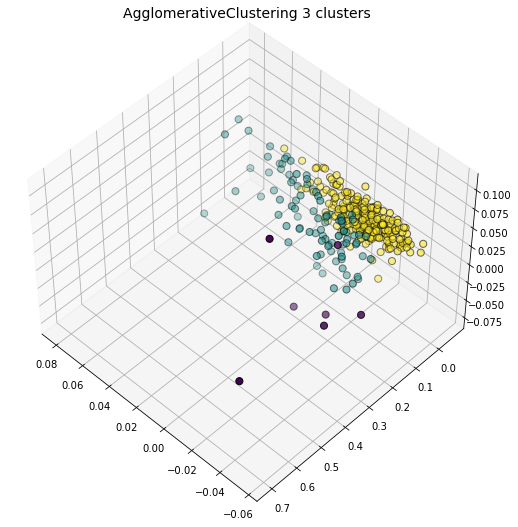

In [60]:
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(scaled_data)
labels = agg_clustering.labels_

#Plotting
pca = PCA(n_components=3).fit(scaled_data)
pca_3d_agg = pca.transform(scaled_data)

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(pca_3d_agg[:, 1], pca_3d_agg[:, 0], pca_3d_agg[:, 2], c=labels.astype(np.float), edgecolor="k", s=50)
plt.title("AgglomerativeClustering 3 clusters", fontsize=14)
plt.show()

## Вывод по иерархической (агломеративной) класстеризации:

Графики агломеративной кластеризации с разными расстояниями незначительно отличаются друг от друга, поэтому выбрать наиболее оптимальное расстояние мы можем на основе дендрограмм - ward. Оптимальное количество кластеров остается равным 3.

Так как использование расстояния ward оказалось наиболее оптимальным, мы не можем попробовать другие метрики, только euclidean.

## 3. Dbscan

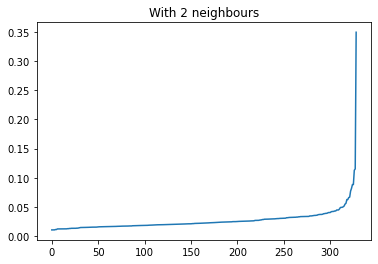

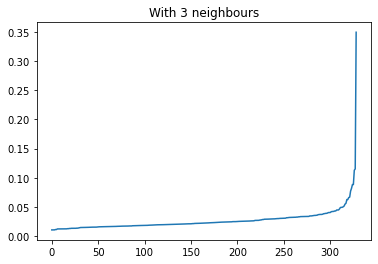

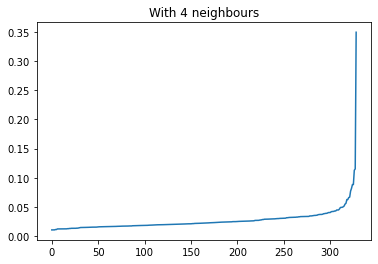

In [48]:
from sklearn.neighbors import NearestNeighbors

for n_neis in range(2, 5):
    neigh = NearestNeighbors(n_neighbors=n_neis)
    nbrs = neigh.fit(scaled_data)
    distances, indices = nbrs.kneighbors(scaled_data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title(f'With {n_neis} neighbours')
    plt.show()

### Вывод по eps

Судя по графикам, лучшим значением eps будет 0.05

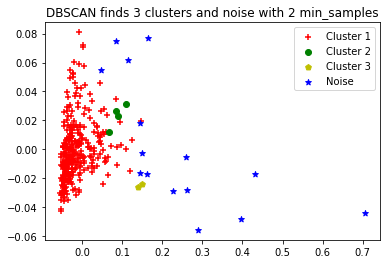

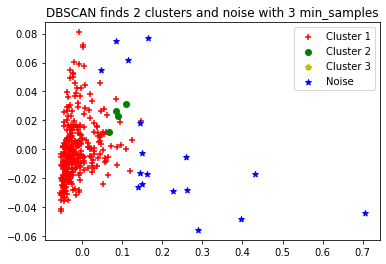

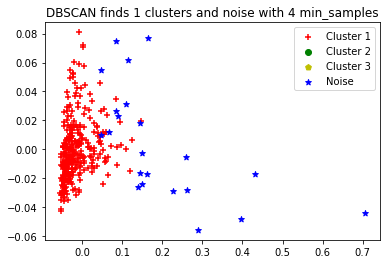

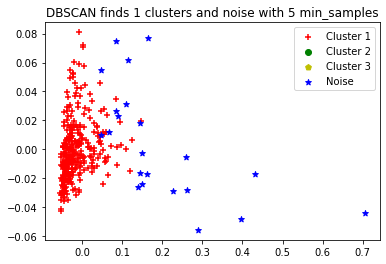

In [45]:
from sklearn.cluster import DBSCAN

for n in range(2, 6):
    dbs = DBSCAN(eps=0.05, min_samples=n, metric='euclidean')
    dbs.fit(scaled_data)
    pca = PCA(n_components=2).fit(scaled_data)
    pca_2d = pca.transform(scaled_data)
    for i in range(0, pca_2d.shape[0]):
        if dbs.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
        elif dbs.labels_[i] == 2:
            c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='p')
        elif dbs.labels_[i] == 1:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        elif dbs.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    plt.legend([c1, c2, c4, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Noise'])
    plt.title(f'DBSCAN finds {len(set(dbs.labels_))-1} clusters and noise with {n} min_samples')
    plt.show()

## Вывод по DBSCAN

В целом DBSCAN выделяет в этих данных один кластер и шум. Наиболее оптимальными параметрами оказываются eps=0.05, а min_samples=4 или 5

## 4. KMeans

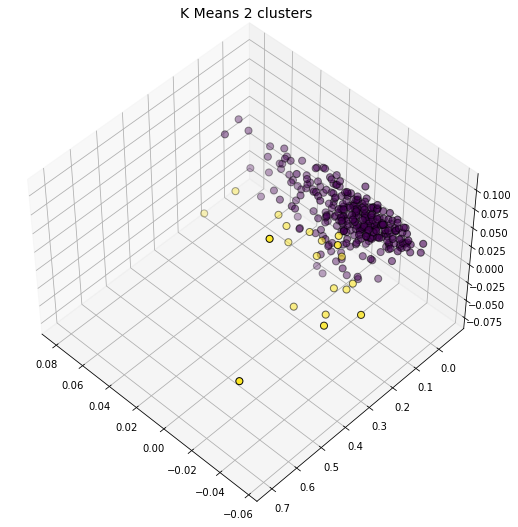

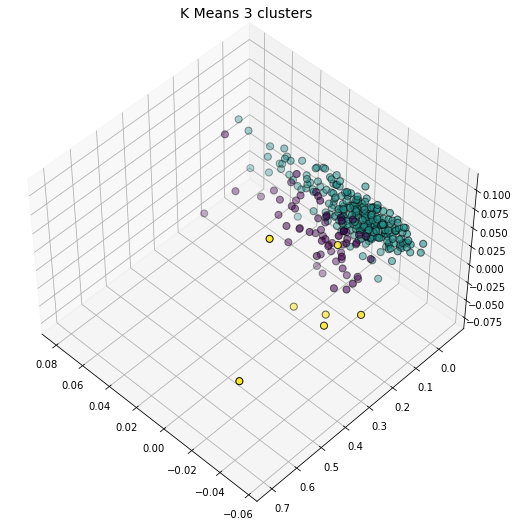

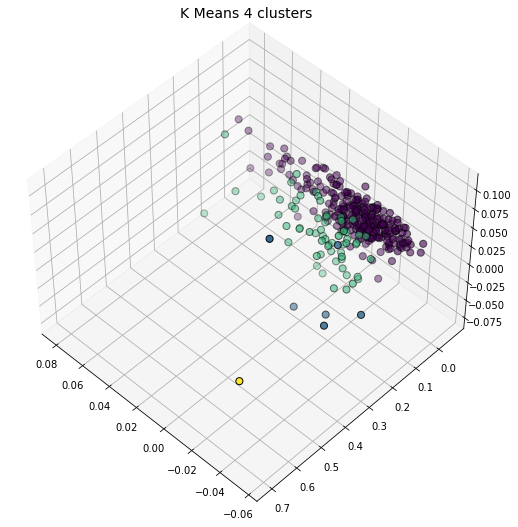

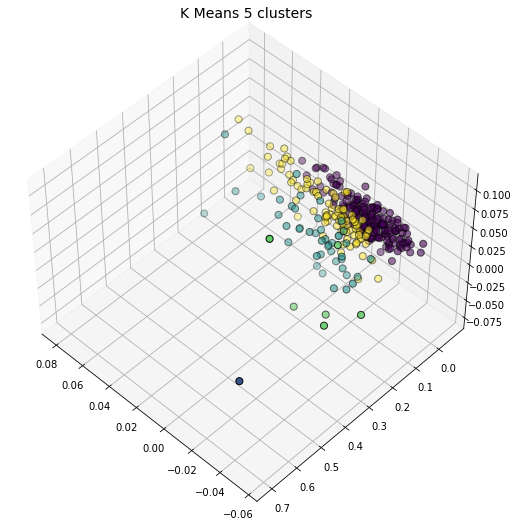

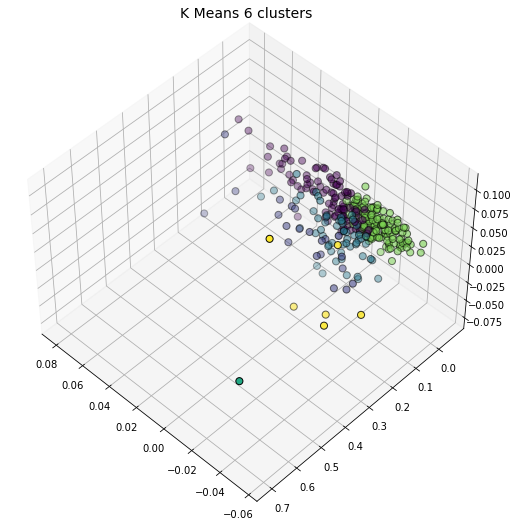

In [56]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

for k in range(2, 7):
    kmeans = KMeans(n_clusters =k).fit(scaled_data)
    labels = kmeans.labels_
    
    #Plotting
    pca = PCA(n_components=3).fit(scaled_data)
    pca_3d = pca.transform(scaled_data)
    
    fig = plt.figure(1, figsize=(7,7))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    ax.scatter(pca_3d[:, 1], pca_3d[:, 0], pca_3d[:, 2], c=labels.astype(np.float), edgecolor="k", s=50)
    plt.title(f"K Means {k} clusters", fontsize=14)
    plt.show()

## Вывод по KMeans

Кажется, что лучшим числом кластеров будет 3 - более плотные данные, более разреженные и "выбросы"

## 6. Оценка алгоритмов, используя метрики

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sils = {}
harabaz = {}
bouldin = {}

# AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(scaled_data)
labels = agg_clustering.labels_
sils['Agglomerative'] = silhouette_score(scaled_data, labels, metric='euclidean')
harabaz['Agglomerative'] = calinski_harabasz_score(scaled_data, labels)
bouldin['Agglomerative'] = davies_bouldin_score(scaled_data, labels)

# DBSCAN
dbs = DBSCAN(eps=0.05, min_samples=4, metric='euclidean').fit(scaled_data)
labels = dbs.labels_
sils['DBSCAN'] = silhouette_score(scaled_data, labels, metric='euclidean')
harabaz['DBSCAN'] = calinski_harabasz_score(scaled_data, labels)
bouldin['DBSCAN'] = davies_bouldin_score(scaled_data, labels)

# KMeans
kmeans = KMeans(n_clusters=3).fit(scaled_data)
labels = kmeans.labels_
sils['KMeans'] = silhouette_score(scaled_data, labels, metric='euclidean')
harabaz['KMeans'] = calinski_harabasz_score(scaled_data, labels)
bouldin['KMeans'] = davies_bouldin_score(scaled_data, labels)

print(f'silhouette_score: {sils}')
print(f'calinski_harabasz_score: {harabaz}')
print(f'davies_bouldin_score: {bouldin}')

silhouette_score: {'Agglomerative': 0.377429655132037, 'DBSCAN': 0.6474311233661679, 'KMeans': 0.4408569121226443}
calinski_harabasz_score: {'Agglomerative': 224.57627096279037, 'DBSCAN': 194.21005373762614, 'KMeans': 250.4798709373858}
davies_bouldin_score: {'Agglomerative': 1.070699177264485, 'DBSCAN': 0.8935767145991863, 'KMeans': 0.9200599499414334}


## 7. Общий вывод по всем алгоритмам

Рассмотрев и проанализировав все алгоритмы, метрики оценивания, получившиеся кластеризации и их графики, я пришла к выводу, что алгоритм KMeans справился с этой задачей лучше остальных алгоритмов. Соответственно, 3 кластера кажутся мне оптимальными для данного набора.

## 8. Географическое распределение

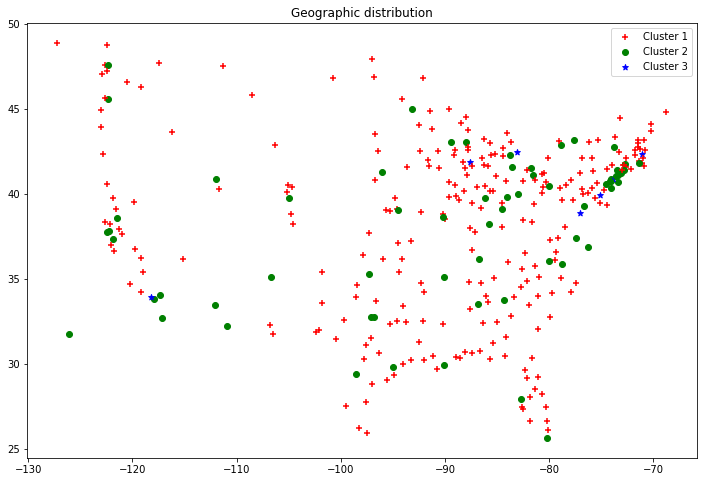

In [78]:
clastered_data = scaled_data.copy()
kmeans = KMeans(n_clusters=3).fit(scaled_data)
clastered_data['class'] = kmeans.labels_
clastered_data['Long'] = data['Long']
clastered_data['Lat'] = data['Lat']

plt.figure(figsize=(12,8))
for i in range(0, len(clastered_data)):
    if clastered_data['class'][i] == 0:
        c1 = plt.scatter(clastered_data['Long'][i],clastered_data['Lat'][i],c='r', marker='+')
    elif clastered_data['class'][i] == 1:
        c2 = plt.scatter(clastered_data['Long'][i],clastered_data['Lat'][i],c='g', marker='o')
    elif clastered_data['class'][i] == 2:
        c3 = plt.scatter(clastered_data['Long'][i],clastered_data['Lat'][i],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title(f'Geographic distribution')
plt.show()

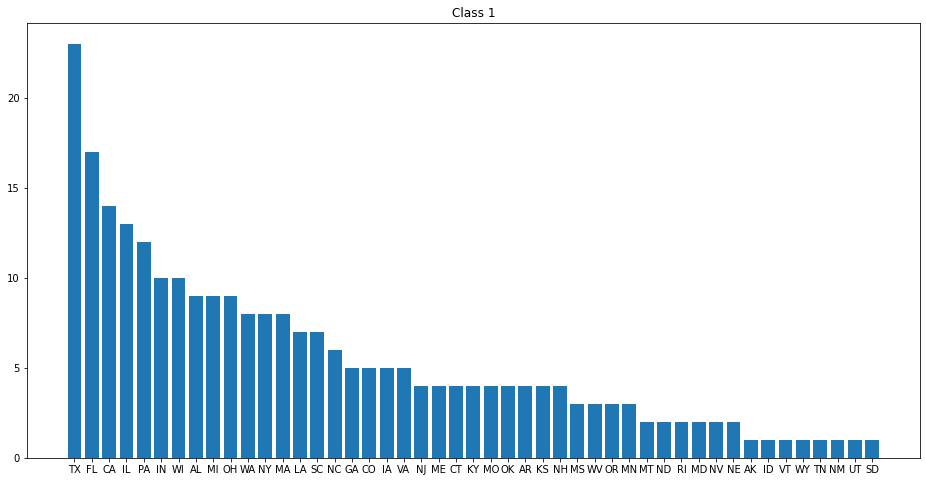

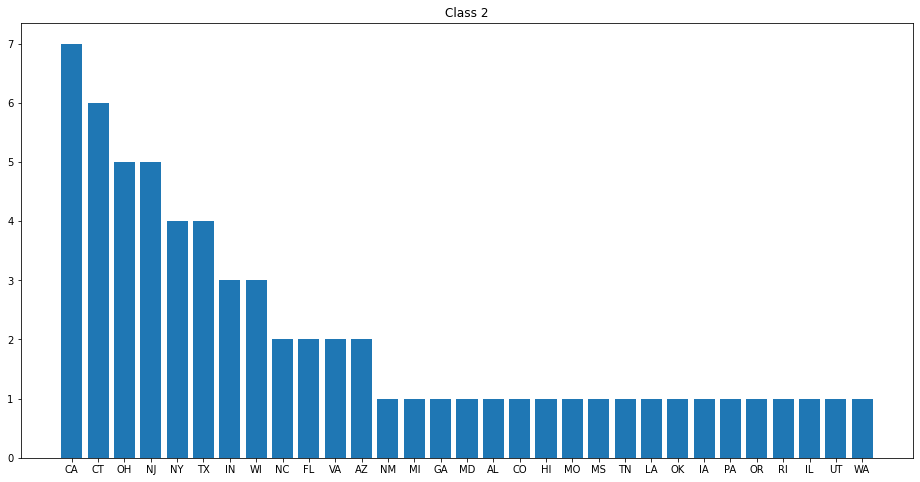

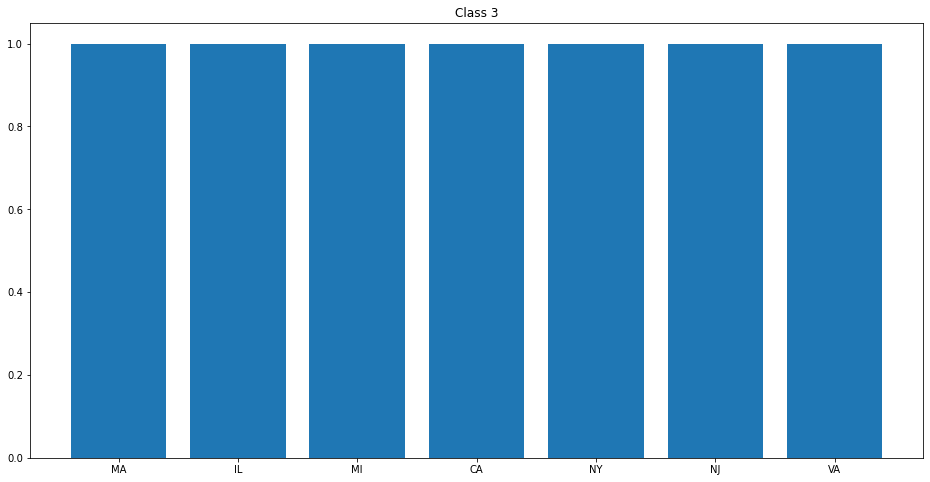

In [112]:
states = pd.DataFrame(clastered_data['class'], columns=['class'])
states['Place'] = [i[-2:] for i in data['Place']]
state_freqs = [{},{},{}]
for index, row in states.iterrows():
    state_freqs[row['class']][row['Place']] = state_freqs[row['class']].get(row['Place'], 0) + 1

for i, freq in enumerate(state_freqs):
    cur_dict = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(16,8))
    plt.bar(cur_dict.keys(), cur_dict.values())
    plt.title(f'Class {i+1}')
    plt.show()

### Выводы по графикам

Судя по координатам, города в 2х кластерах из 3х распределены по карте более-менее равномерно (присутсвуют данные в каждой части страны), поэтому стоит посмотреть на самые частые штаты по кластерам. В первом это Техас (центральная часть страны), во втором - Калифорния (западное побережье) (а на втором месте Коннектикут - восточное побережье). У третьего класса каждый из представленных штатов встречается один раз, и большинство из них расположены на восточном побережье страны. Также и для 1 и 2 кластера города расположены более плотно на восточном побережье.

In [118]:
# !conda install -c conda-forge folium

In [136]:
import folium

m = folium.Map(location=[46.3014, -123.7390], zoom_start=7, tiles="Stamen Terrain")

for i in range(len(clastered_data)):
    if clastered_data['class'][i] == 0:
        folium.CircleMarker(
            location=[clastered_data['Lat'][i], clastered_data['Long'][i]],
            radius=1,
            fill=True,
            popup=folium.Popup(f"{data['Place'][i]}. Coordinates: {clastered_data['Lat'][i]}, {clastered_data['Long'][i]}"),
        ).add_to(m)
    
    elif clastered_data['class'][i] == 1:
        folium.CircleMarker(
            location=[clastered_data['Lat'][i], clastered_data['Long'][i]],
            radius=1,
            fill=True,
            popup=folium.Popup(f"{data['Place'][i]}. Coordinates: {clastered_data['Lat'][i]}, {clastered_data['Long'][i]}"),
            color='#ff4433'
        ).add_to(m)
    
    elif clastered_data['class'][i] == 2:
        folium.CircleMarker(
            location=[clastered_data['Lat'][i], clastered_data['Long'][i]],
            radius=1,
            fill=True,
            popup=folium.Popup(f"{data['Place'][i]}. Coordinates: {clastered_data['Lat'][i]}, {clastered_data['Long'][i]}"),
            color='#eeff33'
        ).add_to(m)

m

Карта также подтверждает, что большая часть данных сосредоточена на восточном побережье страны и в целом в восточной ее половине.